# Exercises week 2

Dependencies needed to run this Notebook (uncomment the lines below to install dependencies if needed)

In [1]:
# !pip install -m requirements.txt

# or
# %pip install requests==2.31.0
# %pip install scipy

## Exercises 1

Import **requests** in order to download the tsv files, and numpy and Pandas to work with data.

In [2]:
import requests
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'requests'

### 1.1 Start by downloading these four datasets

In [ ]:
for i in range(1,5):
    req = requests.get(f'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data{i}.tsv')
    
    with open(f'data{i}.tsv', 'w') as f:
        f.write(req.text)   

Load each files content into a DataFrame naming the collums x and y, and then these dataframes into a dict.

In [ ]:
data = {f'df{i}': pd.read_csv(f'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data{i}.tsv', sep='\t', names=['x', 'y']) for i in range(1,5)}

### 1.2. Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset
_(Use python string formatting to print precisely two decimal places of these results to the output cell.)_

In [ ]:
for i, df in enumerate(data.values(), start=1):
    x_mean = np.mean(df['x'])
    y_mean = np.mean(df['y'])
    
    print(f'data{i}.tsv file')
    print('=================')
    print(f'Mean of X values: {x_mean:.2f}')
    print(f'Mean of Y values: {y_mean:.2f}')
    print()

data1.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data2.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data3.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50

data4.tsv file
Mean of X values: 9.00
Mean of Y values: 7.50



### 1.3 Now calculate the variance for all of the various sets of x- and y-values, by using the numpy function var.
Print it to three decimal places.

In [ ]:
for i, df in enumerate(data.values(), start=1):
    x_var = np.var(df['x'])     # here is calculated population variance, 
    y_var = np.var(df['y'])     # if sample variance is preferred a "ddof=1" parameter is needed, or use pd.var() instead.
    
    
    print(f'Variance of data in data{i}.tsv file')
    print('=================')
    print(f'Variation of X values: {x_var:.3f}')
    print(f'Variation of Y values: {y_var:.3f}')
    print()

Variance of data in data1.tsv file
Variation of X values: 10.000
Variation of Y values: 3.752

Variance of data in data2.tsv file
Variation of X values: 10.000
Variation of Y values: 3.752

Variance of data in data3.tsv file
Variation of X values: 10.000
Variation of Y values: 3.748

Variance of data in data4.tsv file
Variation of X values: 10.000
Variation of Y values: 3.748



### 1.4 Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets 
(also print to three decimal places)

In [ ]:
for i, df in enumerate(data.values(), start=1):
    matrix = np.corrcoef(df['x'], df['y'])
    
    print(f'PCC of data in data{i}.tsv file')
    print('=================')
    print(f'PCC between x and y: {matrix[0,1]:.3f}')
    print()

PCC of data in data1.tsv file
PCC between x and y: 0.816

PCC of data in data2.tsv file
PCC between x and y: 0.816

PCC of data in data3.tsv file
PCC between x and y: 0.816

PCC of data in data4.tsv file
PCC between x and y: 0.817



### 1.5 use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b
(to two decimal places)

In [ ]:
from scipy import stats

In [ ]:
for i, df in enumerate(data.values(), start=1):
    a, b, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    
    print(f'Linier regression of data in data{i}.tsv file')
    print('==============================================')
    print(f'The value of a: {a:.2f}')
    print(f'The value of b: {b:.2f}')
    print()

Linier regression of data in data1.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data2.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data3.tsv file
The value of a: 0.50
The value of b: 3.00

Linier regression of data in data4.tsv file
The value of a: 0.50
The value of b: 3.00



### 1.6 Comment on the results from the previous steps. What do you observe?

Generally, the datasets are very similar concerning the **Mean** of their x and y data (1.2).  
The **Variance** of its x-values is precisely 10 in all datasets, and practically equal for the y-values, with a small difference of .004 between datasets (1, 2), and (3, 4) (1.3).  
The **correlation** between x- and y-values in all four datasets is also very close to being equal (1.4).     
Regarding the **linear regression** analysis, the slope corresponding to all datasets is 0.5, and the y-intercept is at 3.0 (1.5).  
So, even though the actual data in the four datasets differ, they seem equal when viewed through the above tools.

### 1.7 plot the four datasets using matplotlib.pyplot
* Use a two-by-two subplot to put all of the plots nicely in a grid and 
* use the same x and y range for all four plots. 
* And include the linear fit in all four plots.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a, b, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])

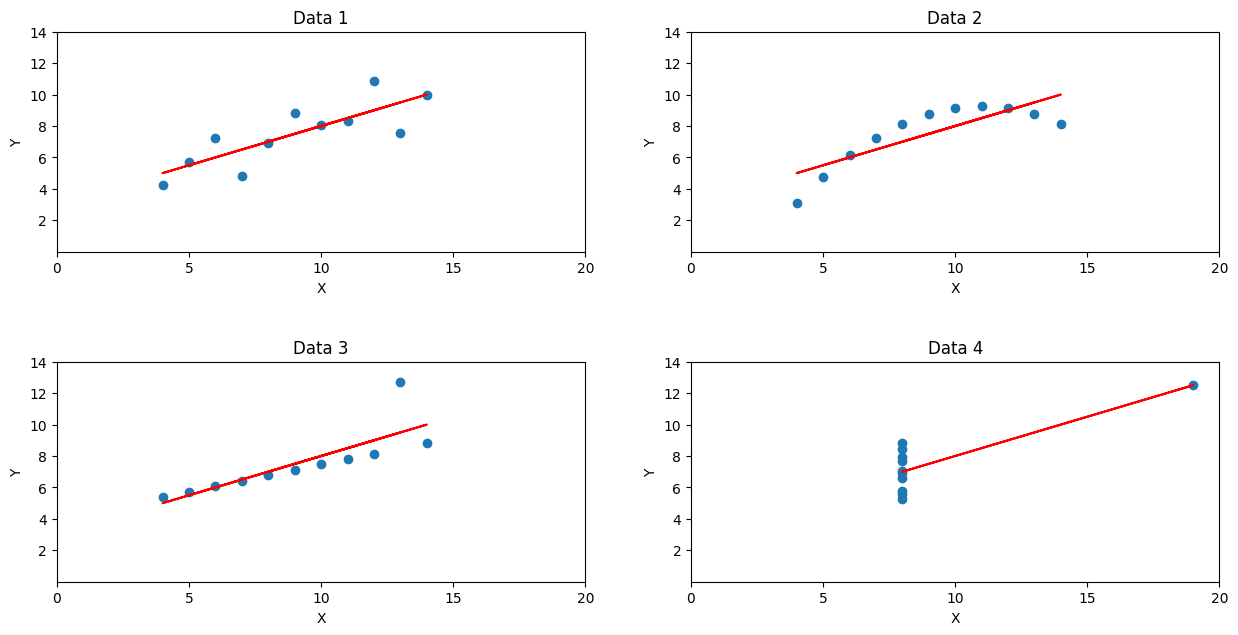

In [ ]:
fig = plt.figure(figsize=(15, 20))  # create a figure (canvas like)
plt.subplots_adjust(hspace=0.5)  # addjust the space between the rows

for i, df in enumerate(data.values(), start=1):
    
    a, b, *args = stats.linregress(df['x'], df['y']) # calculate the linear regression
    reg = a * df['x'] + b # calculate the y koordiantes for the regression line (slope * x-values * intersction).

    # add the data to a subplot
    ax = fig.add_subplot(len(df)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    ax.set_title(f'Data {i}')
    ax.set_xlim([0, 20]) # set x axis to show from 0 to 20
    ax.set_ylim([0, 14]) # set y axis to show from 0 to 14
    ax.set_xticks(range(0, 21, 5)) # adjust the x-ticks layout
    ax.set_yticks(range(2, 15, 2)) # adjust the y-ticks layout
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    ax.scatter(df['x'], df['y']) # add data to the chart (x,y)
    ax.plot(df['x'], reg, color='red') # add the regression line

plt.show()

### 1.8 Explain - in your own words - what you think my point with this exercise is.

I believe the purpose of these exercises is partly to gain hands-on experience with Python's numpy, pandas, scipy, and matplotlib libraries, in conjunction with basic statistical operations. They also aim to deepen our understanding of how datasets with identical statistical properties, such as mean, variance, and correlation, can appear similar when subjected to statistical analyses. However, this does not necessarily imply that the datasets are identical or can be interpreted as such. For instance, datasets with the same mean, variance, and correlation may still differ significantly. The visual look of the data on the other hand is clearly showing a difference in what the data tell, and it shows the importance of visual plots when working with data.

### 1.9 What did you get out of asking the LLM about the previous sub-question? 
* How did you even go about asking the LLM about the point of the entire set of questions? 
* Reflect on whether or not the LLM helped you get smarter?

Generally, I used ChatGPT for two things. Instead of using the documentation of Python libraries to figure out which methods were relevant for a specific operation, I used the LLM as a reference. This wasn't much different from what I did earlier with, for instance, Stack Overflow (Google). I have forced myself to understand what I got from the LLM, and not just accept it. For me, it is clearly the best way to learn. First, explain to myself what I want, then ask the LLM how it's done, and then keep on asking "why" until I understand the topic.

Another thing I used ChatGPT for in this assignment has been to refresh my knowledge about Mean, Variance, PCC, and other basic statistical tools. For this, I also used other online resources, mainly YouTube, but ChatGPT was a help.

Regarding the last question (Reflect on whether or not the LLM helped you get smarter?): Then yes, it is a brilliant tutor, especially if one keeps on asking "why" to everything until one gets it.

## Exercise 2: Questions for the lecture.

### 2.1 What is the difference between data and metadata? 

Data is the raw data collected or given. Meta data is data about data.    
Related to "Anscombe's quartet" the numbers in the tsv files are the data.    
An example of metadata would be the information about how these datasets where created (e.g what is writting in the wikipedia page).

### 2.1.1 How does that relate to the GPS tracks-example?

The data would be what is in the xml file. The metadata would be the generated trees, houses an streets in the google earth video example.    
The data in it self can be a bit abstract to think about but when put into a context it suddently makes more sense.

### 2.2 Sune says that the human eye is a great tool for data analysis. 
##### Do you agree? Explain why/why not.

If we think of the eye as a tool for generating abstractions, it takes in raw caotic data and organises it into a meaningfull, simplified and context related information. Then yes i think it is a great tool for dataanalisys. 

##### Mention something that the human eye is very good at.

Creating an efficient interface to a more complex dataset. 

##### Can you think of something that is difficult for the human eye. Explain why your example is difficult.

When what we look at becomes to detailed it is gennerally more difficult for the eye to grasp. Again the idea of the eye creating an abstraction or an interface to the complex underliying datastructures.

##### Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

"Simpson’s Paradox is a statistical phenomenon where an association between two variables in a population emerges, disappears or reverses when the population is divided into subpopulations. For instance, two variables may be positively associated in a population, but be independent or even negatively associated in all subpopulations." - https://plato.stanford.edu/entries/paradox-simpson/

##### Explain the differnece between exploratory and explanatory data analysis

**Exploratory Data Analysis**     
The porpous of exploratory Data Analysis is to get a broad overview of the domain under investigation.      

**Explanatory data analysis**     
Is about explaning the data or deliver a message from what you think the data is telling you. 

## Part 2: Visualizing patterns in the data

In [6]:
#%pip install numpy pandas Pyarrow

In [7]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")